# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
mot_amb_calls_df = pd.read_csv('motorbike_ambulance_calls.csv')

mot_amb_calls_df.head()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [3]:
mot_amb_calls_df.shape

(17379, 15)

In [4]:
mot_amb_calls_df.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [5]:
mot_amb_calls_df.drop_duplicates()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/12,spring,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,12/31/12,spring,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,12/31/12,spring,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,12/31/12,spring,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [6]:
mot_amb_calls_df.describe()

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


**Було завантажено необхідний датасет та проведено базовий аналіз, який включав аналіз на нульові значення та позбування від дуплікатів**

In [7]:
mot_amb_calls_df["season"].unique()

mot_amb_calls_df["date"] = pd.to_datetime(mot_amb_calls_df["date"])
mot_amb_calls_df["date"]

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: date, Length: 17379, dtype: datetime64[ns]

In [8]:
def convertSeason(date):
    
    if date.month in [3, 4, 5]:
        return 1
    elif date.month in [6, 7, 8]:
        return 2
    elif date.month in [9, 10, 11]:
        return 3
    else: return 0

mot_amb_calls_df["season"] = mot_amb_calls_df["date"].apply(convertSeason)
mot_amb_calls_df.sample(10)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
12197,12198,2012-05-28,1,1,5,10,1,1,0,1,0.70,0.6515,0.61,0.0000,364
395,396,2011-01-17,0,0,1,23,1,1,0,3,0.16,0.1364,0.86,0.2836,4
7888,7889,2011-11-30,3,0,11,8,0,3,1,1,0.28,0.2727,0.81,0.1940,478
14258,14259,2012-08-22,2,1,8,7,0,3,1,1,0.62,0.5909,0.78,0.0000,553
881,882,2011-02-09,0,0,2,5,0,3,1,1,0.06,0.1061,0.45,0.1045,7
448,449,2011-01-20,0,0,1,17,0,4,1,2,0.30,0.3182,0.49,0.1045,215
14165,14166,2012-08-18,2,1,8,10,0,6,0,1,0.70,0.6515,0.54,0.1642,480
1510,1511,2011-03-08,1,0,3,7,0,2,1,1,0.18,0.1970,0.64,0.1343,128
9419,9420,2012-02-02,0,1,2,9,0,4,1,3,0.38,0.3939,0.87,0.0000,228
10427,10428,2012-03-15,1,1,3,14,0,4,1,2,0.72,0.6515,0.30,0.1045,258


**Було змінено `Season` з рядкового значення на категоріальну змінну, де 0 - Winter, 1 - Spring, 2 - Summer, 3 - Fall.**

**Було змінено формат для `Date` на YYYY-MM-DD.**

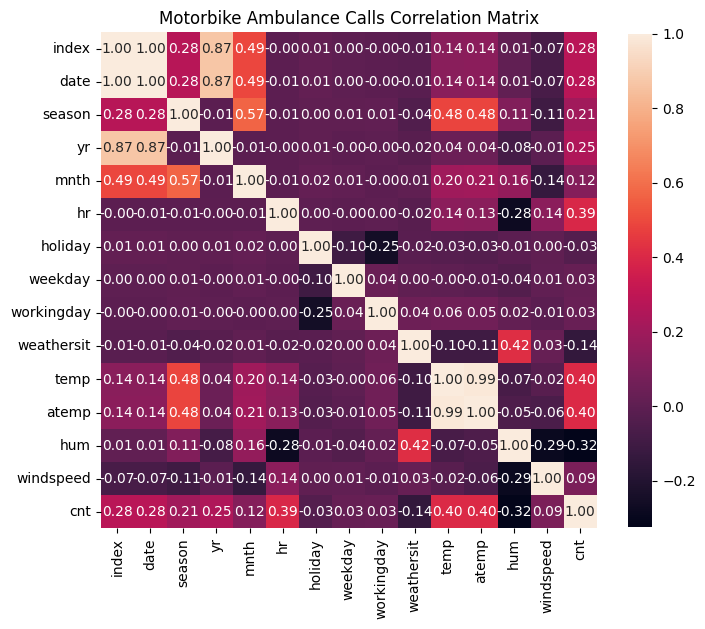

In [9]:
correlation_matrix = mot_amb_calls_df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Motorbike Ambulance Calls Correlation Matrix')

plt.show()

**На даній кореляційній матриці можна побачити, що деякі змінні дещо корелюють одна з одною, як от: `hum`, `windspeed` і `weathersit`. Значення `temp` та `atemp` повністю мультиколінеарні, тобто можна використати `drop` для однієї з змінних. Якщо уважно подивитися, то можна спостерігати відмітну кореляцію між головною змінною `cnt` та `temp`/`hum`, тобто, це свідчить про те, що між ними наявний певний зв'язок.**

In [10]:
mot_amb_calls_df = mot_amb_calls_df.drop(columns=["atemp"])

categorical_variables = mot_amb_calls_df.select_dtypes(include='int').columns
categorical_variables = categorical_variables[1:len(categorical_variables) - 1]
categorical_variables

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

**Змінна `atemp` була видалення, так як вона не несе особливого значення для подальших аналізів**

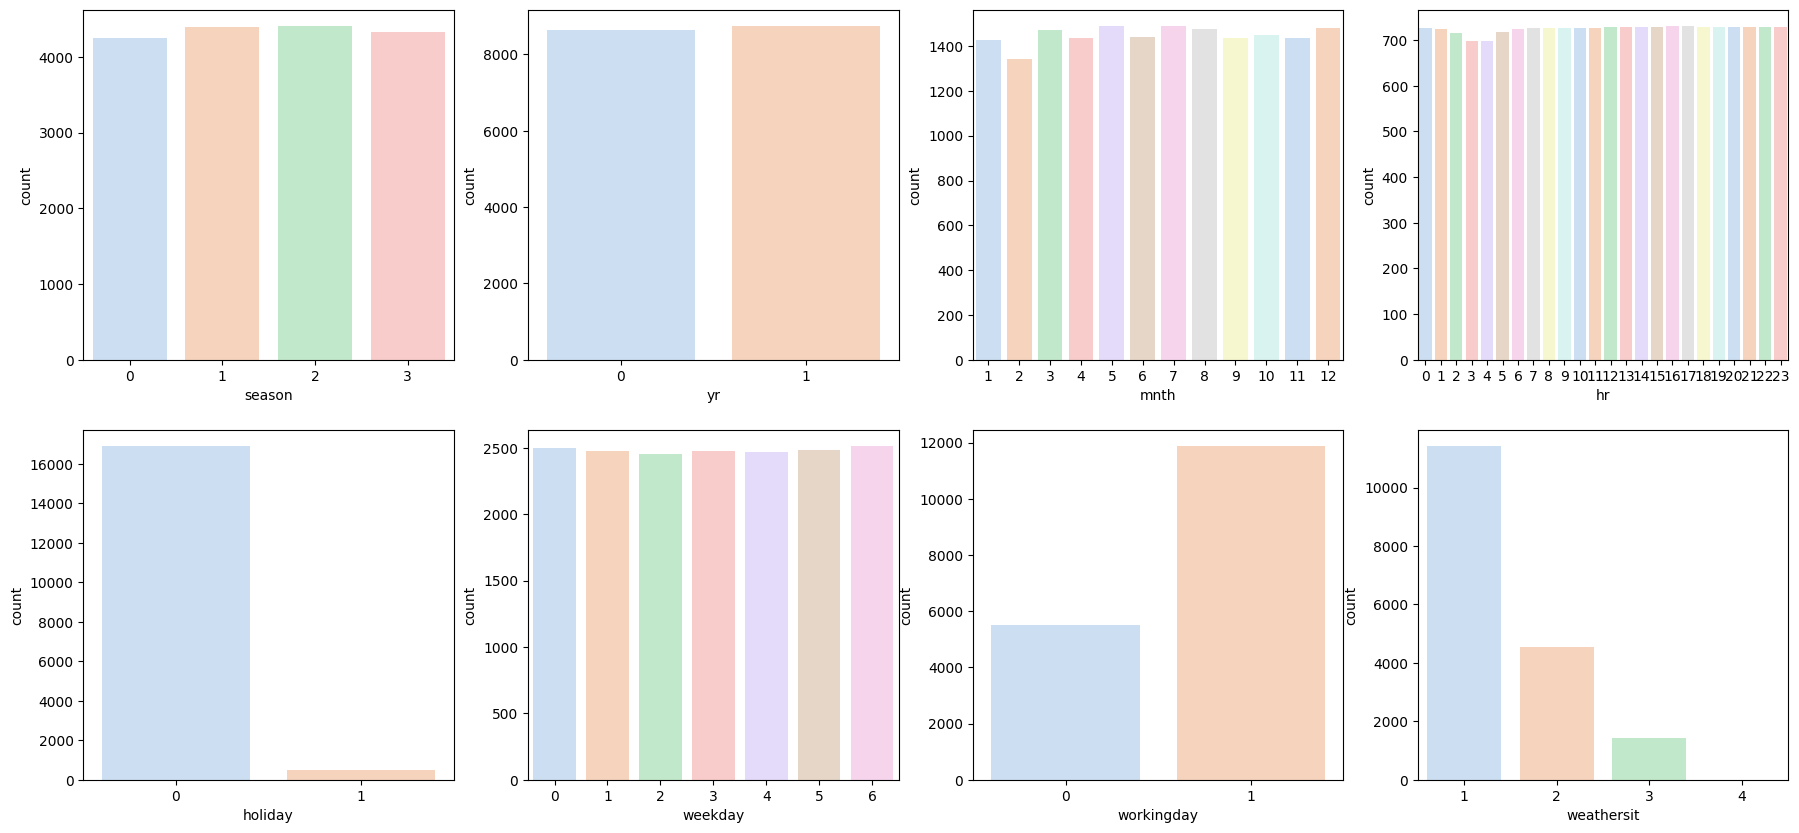

In [11]:
_, ax = plt.subplots(2, 4, figsize=(22, 10))
for col, subplot in zip(categorical_variables, ax.flatten()):
    
    sns.countplot(data=mot_amb_calls_df, x=col, palette="pastel", ax=subplot, alpha=0.6)

In [ ]:
data_numerical = mot_amb_calls_df.filter(items=["temp", "hum", "windspeed"])
data_numerical

,temp,hum,windspeed
0,0.24,0.81,0.0000
1,0.22,0.80,0.0000
2,0.22,0.80,0.0000
3,0.24,0.75,0.0000
4,0.24,0.75,0.0000
...,...,...,...
17374,0.26,0.60,0.1642
17375,0.26,0.60,0.1642
17376,0.26,0.60,0.1642
17377,0.26,0.56,0.1343


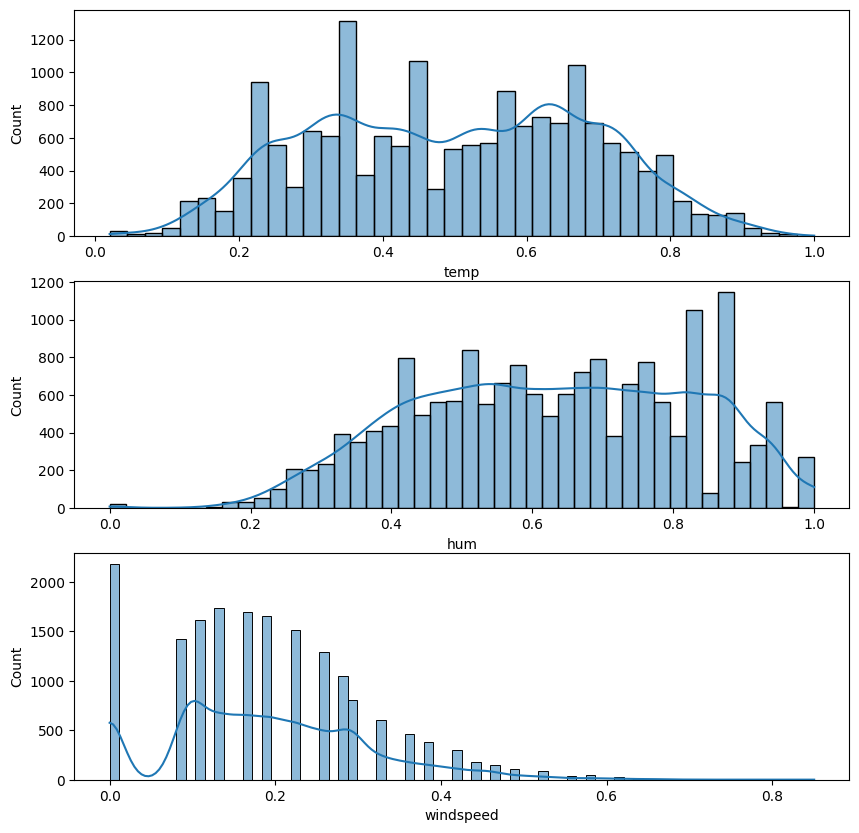

In [33]:
_, ax = plt.subplots(3, 1, figsize=(10, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
    
  sns.histplot(data=data_numerical, x=variable, ax=subplot, kde=True)

**Якщо подивитися на хістплот `температури (temp)`, це дуже схоже на бімодальний розподіл.**

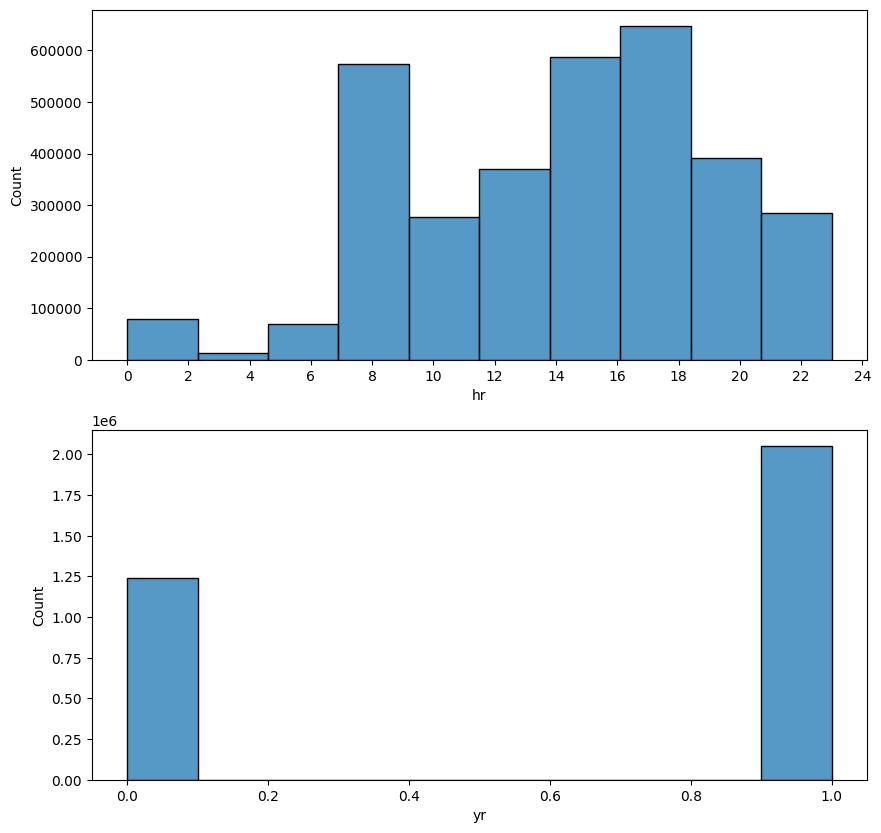

In [35]:
variables_to_target = ["hr", "yr"]
_, ax = plt.subplots(2, 1, figsize=(10, 10))
for i in range(len(variables_to_target)):
    
    sns.histplot(data=mot_amb_calls_df, x=variables_to_target[i], weights="cnt", ax=ax[i])
    ax[0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])

**По першому хістплоту помітно, що найбільша кількість викликів швидкої допомоги припадає на діапазон з 7 години по 23 годину. Якщо говорити за другий, то показники викликів швидкої допомоги у 2011 році значно нижчі, ніж у 2012 році, тому це можна розділити на два окремі датасети.**

<Axes: xlabel='cnt', ylabel='Density'>

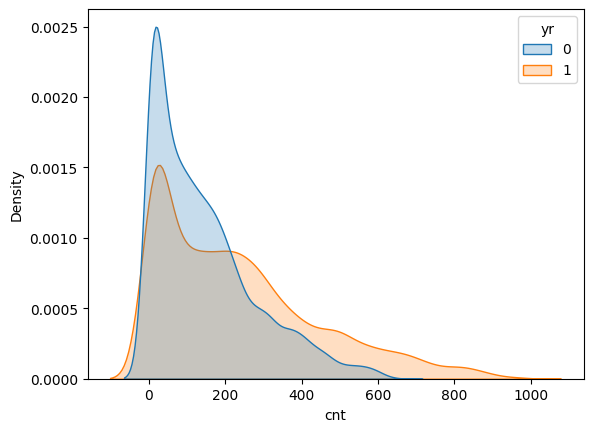

In [15]:
sns.kdeplot(data=mot_amb_calls_df, x='cnt', hue='yr', fill=True)

In [16]:
mot_amb_calls_df_2011 = mot_amb_calls_df[mot_amb_calls_df["yr"] == 0]
mot_amb_calls_df_2012 = mot_amb_calls_df[mot_amb_calls_df["yr"] == 1]

mot_amb_calls_df_2011.to_csv("datasets/mot_amb_calls_df_2011.csv")
mot_amb_calls_df_2012.to_csv("datasets/mot_amb_calls_df_2012.csv")

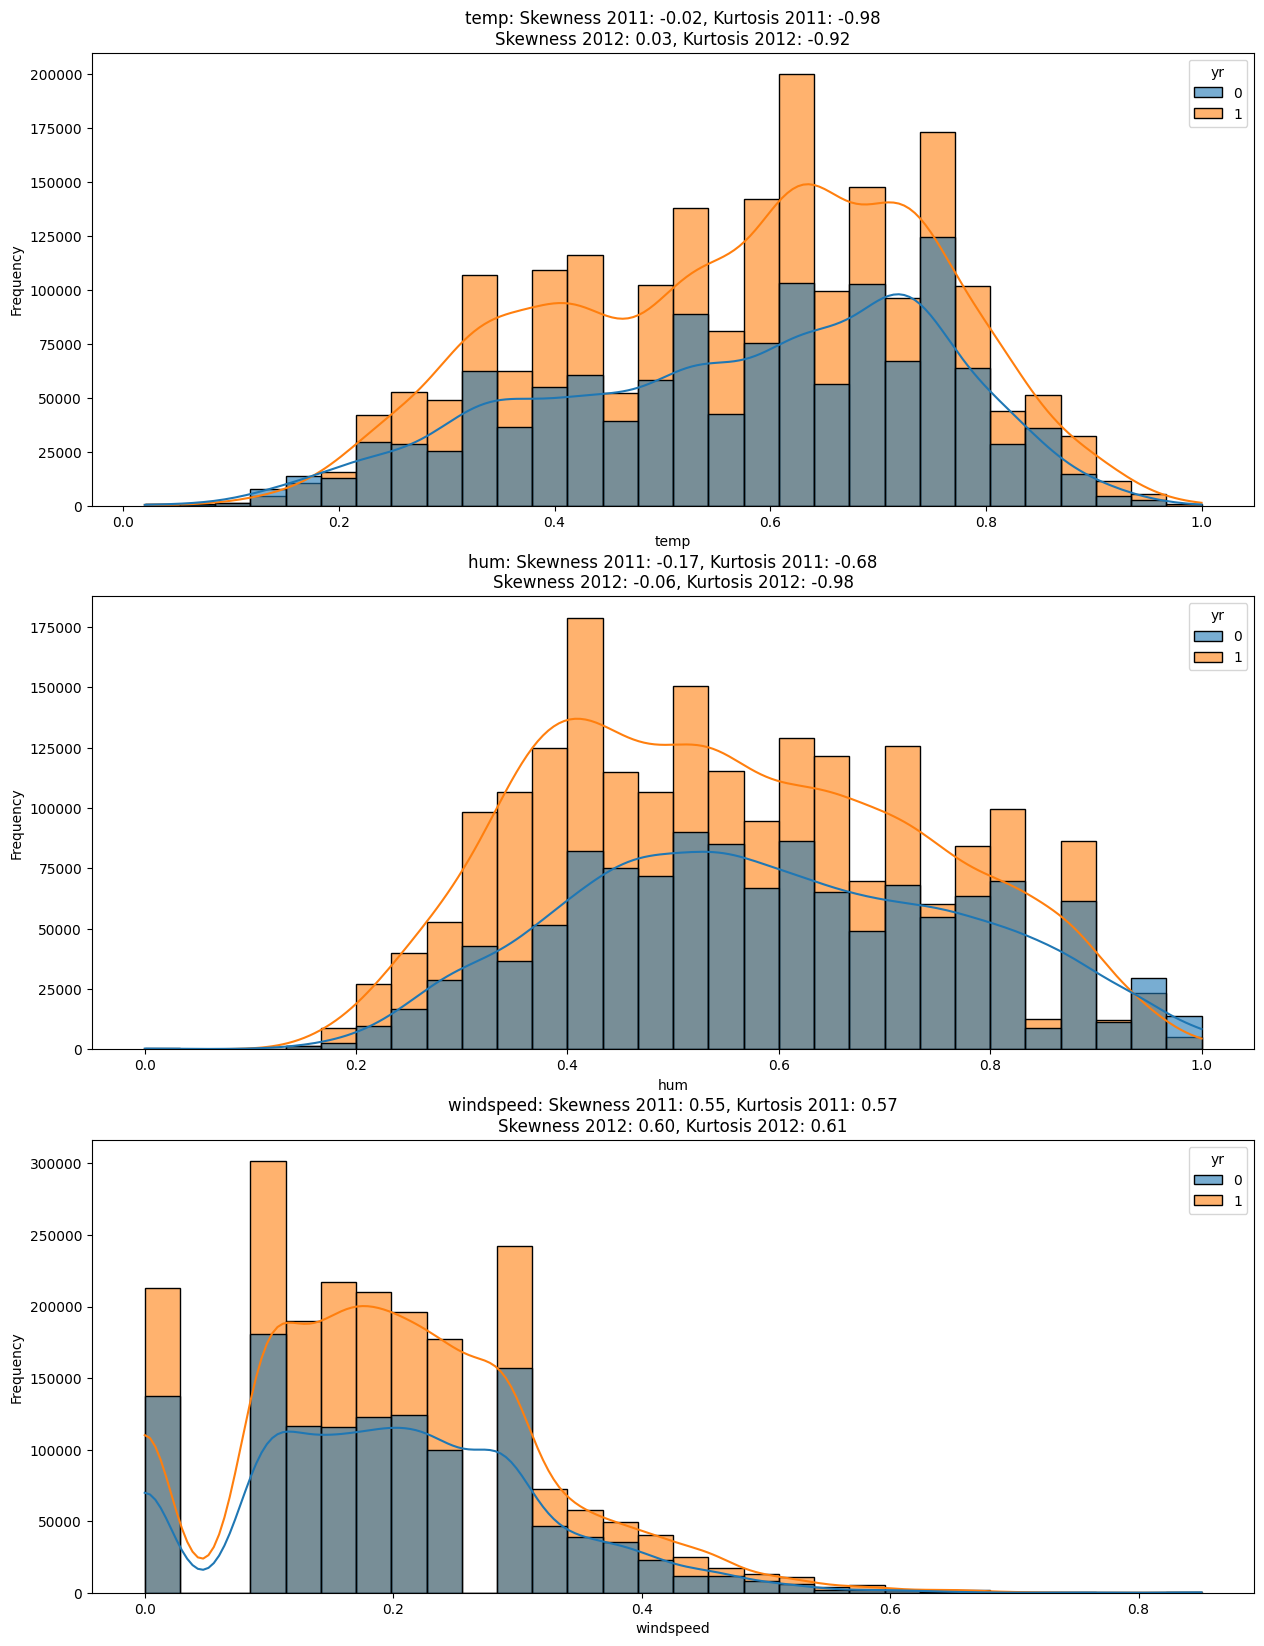

In [41]:
numerical_data = mot_amb_calls_df.loc[:, ["temp", "hum", "windspeed"]]
_, ax = plt.subplots(3, 1, figsize=(15, 20))

for col, subplot in zip(numerical_data.columns, ax.flatten()):
    
    data_2011 = mot_amb_calls_df[mot_amb_calls_df["yr"] == 0][col]
    data_2012 = mot_amb_calls_df[mot_amb_calls_df["yr"] == 1][col]

    col_skewness_2011 = skew(data_2011, nan_policy='omit')
    col_skewness_2012 = skew(data_2012, nan_policy='omit')

    col_kurtosis_2011 = kurtosis(data_2011, nan_policy='omit')
    col_kurtosis_2012 = kurtosis(data_2012, nan_policy='omit')

    sns.histplot(data=mot_amb_calls_df, x=col, kde=True, weights="cnt", hue="yr", ax=subplot, bins=30, alpha=0.6)

    subplot.set_title(f"{col}: Skewness 2011: {col_skewness_2011:.2f}, Kurtosis 2011: {col_kurtosis_2011:.2f}\n"
                      f"Skewness 2012: {col_skewness_2012:.2f}, Kurtosis 2012: {col_kurtosis_2012:.2f}")
    
    subplot.set_xlabel(col)
    subplot.set_ylabel('Frequency')

**Згідно хістплотів, які обчислюють `Skewness` та `Kurtosis` за два роки окремо, можна зробити деякі висновки:**
- `temp`: функція виглядає найбільш нормальною, так як коефіцієнти асиметрії та ексцесу дуже низькі (майже не доходять до нуля з позначкою +).
- `hum`: функція є дещо цікавою, в 2012 році все виглядало добре, але в 2011 році коефіцієнт асиметрії становить `-0,17`, а ексцес - `-0,68`, що означає довший хвіст зліва.
- `windspeed`: тут можна спостерігати довгий хвіст справа та відповідні коефіцієнти асиметрії й ексцесу ( приблизно`0,60`).

In [18]:
X = mot_amb_calls_df[["temp", "hum", "windspeed", "season", "weathersit", "hr", "holiday", "weekday", "workingday"]]
y = mot_amb_calls_df["cnt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Після аналізу датасету було розділено дані на набори для тренування та тестування**

In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [20]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [21]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

**Після тренування було оцінено моделі за `Середньою Квадратичною Помилкою (MSE)` та `R² score`**

In [22]:
models = {"Linear Regression": lr_preds, "Decision Tree": dt_preds, "Random Forest": rf_preds}
results = {}

In [23]:
for model_name, predictions in models.items():
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[model_name] = {"MSE": mse,"R2": r2}
    print(f"{model_name} - MSE: {mse:.2f},  R²: {r2:.2f}")

Linear Regression - MSE: 20873.44,  R²: 0.34
Decision Tree - MSE: 8779.37,  R²: 0.72
Random Forest - MSE: 4699.24,  R²: 0.85


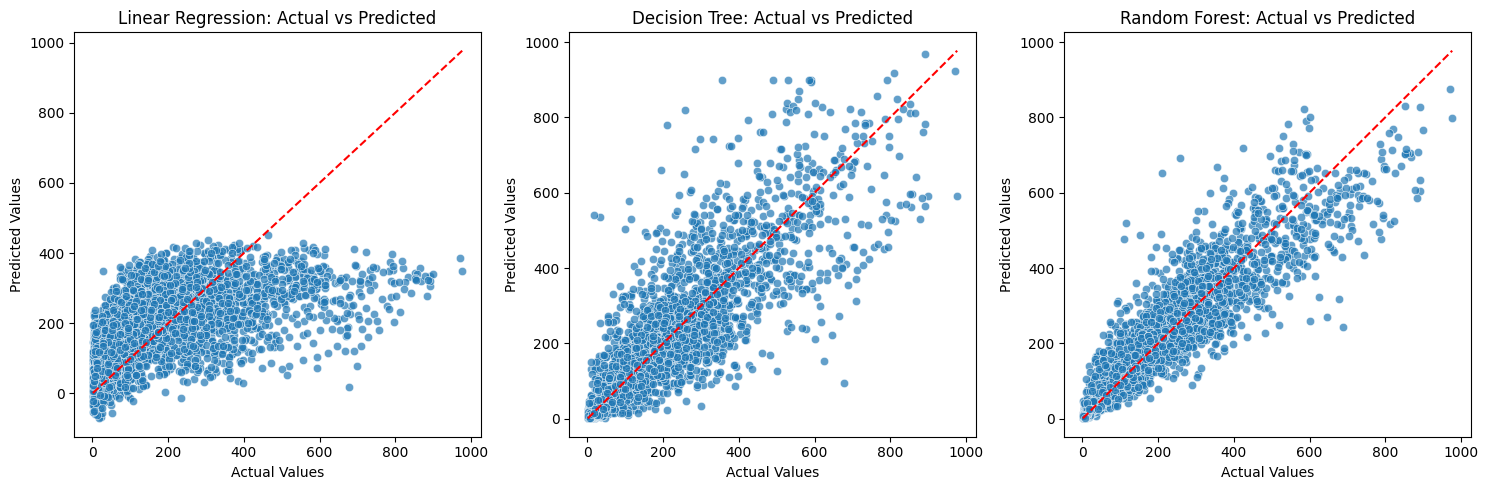

In [24]:
plt.figure(figsize=(15, 5))
for i, (model_name, predictions) in enumerate(models.items()):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=y_test, y=predictions, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
    plt.title(f"{model_name}: Actual vs Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

**Дані діаграми розсіювання (scatterplot) забезпечують візуальне порівняння прогнозованих значень із фактичними цільовими значеннями для кожної моделі. Ідеальна модель повинна мати всі точки, вирівняні вздовж діагональної червоної лінії, що вказувало б на відсутність відхилень між фактичними та прогнозованими значеннями.**

**Точки, що суттєво відхиляються від лінії, вказують на ті області, де модель недопрацювала, тоді як щільний кластер навколо червоної лінії вказує на хорошу ефективність прогнозування. Тому моделі з більшим розкидом передбачають більші помилки передбачення**

**По спостереженням модель `випадкового лісу (Random Forest)` справилася найкраще**

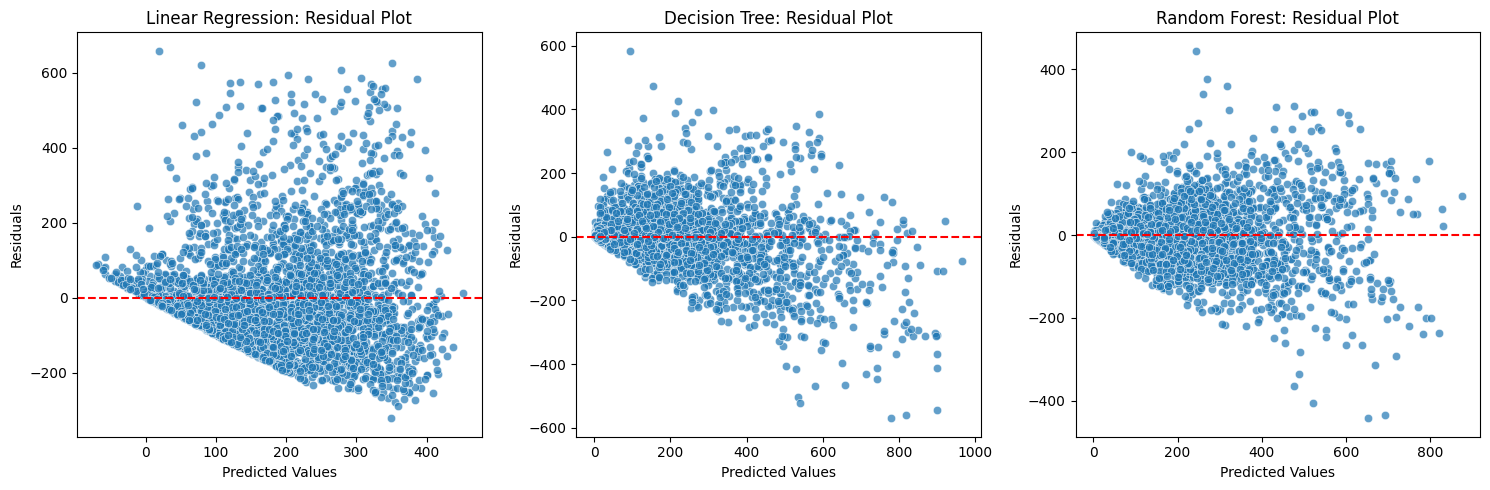

In [25]:
plt.figure(figsize=(15, 5))
for i, (model_name, predictions) in enumerate(models.items()):
    residuals = y_test - predictions
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=predictions, y=residuals, alpha=0.7)
    plt.axhline(0, color="red", linestyle="--")
    plt.title(f"{model_name}: Residual Plot")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

**Графіки залишків аналізують помилки передбачення для кожної моделі. Хороша модель демонструватиме залишки, випадково розкидані навколо нуля, що вказує на відсутність системного зміщення в прогнозах.**

**Воронкоподібна форма або крива у залишках вказують на такі проблеми, як нелінійність, а кластери залишків над або під червоною лінією вказують на упередженість прогнозів.**

**Ці графіки аідходять для діагностики проблем із припущеннями моделі або даними, які можуть вимагати подальшої попередньої обробки або коригування. Рівномірний розкид передбачає добре відкалібровані прогнози**

**Наближеними до хорошого результату знову є показники моделі `Random Forest`**

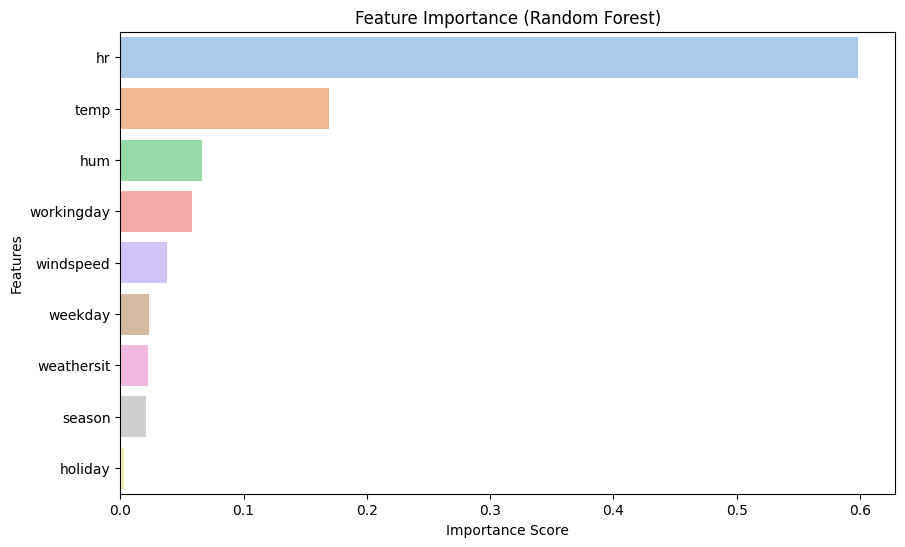

In [42]:
if hasattr(rf_model, "feature_importances_"):
    feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_importance.index, palette="pastel")
    plt.title("Feature Importance (Random Forest)")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    
    plt.show()

**Дана діаграма показує, які характеристики мали найбільший вплив на прогнози в моделі `Random Forest`. Чим вони вищі, тим більшу важливість вони мають відповідно.**

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

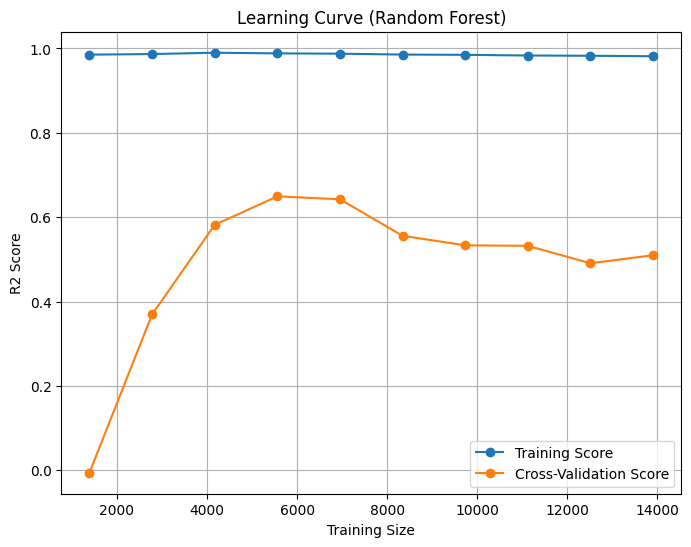

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", marker="o")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", marker="o")
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training Size")
plt.ylabel("R2 Score")
plt.legend()
plt.grid()

plt.show()

**`Learning Curve` демонструє зв’язок між обсягом навчання та продуктивністю моделі.**

**Невеликий розрив між показниками навчання та перехресної перевірки вказує на добре узагальнену модель, а якщо розрив великий, то це свідчить про перенавчання.**

**Якщо обидва показники досягають плато зі збільшенням обсягу навчання, додавання додаткових даних може не значно покращити продуктивність.**

**Цей аналіз допомагає оцінити баланс моделі між упередженістю і дисперсією та її масштабованість за допомогою додаткових даних.**

**`Лінійна регресія` за результатами має найнижчий показник R² (0.34) і відповідно найвищий показник MSE (20873.44)**

**`Дерево рішень` продемонструвало посередні результати, проте не найгірші: R² - 0,72 та MSE - 8779.37**

**`Випадковий ліс` продемонстрував найкращий показник R² (0,85) і найнижчим показником MSE (4699.24)**

**Змінні `година (hr)`, `вологість (hum)` і `температура (temp)` значною мірою сприяють прогнозуванню кількості викликів швидкої**